# 1- Perkenalan

Nama : Ulul Azmi \
Batch : FTDS 015 remote \
Dataset : Telco Customer Churn dari Kaggle.com yang bisa di download di [sini](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) \
Problems : Membuat model ANN untuk memprediksi customer churn menggunakan dataset yang sudah kalian simpan.

## Dataset Details
| Nama Kolom | Deskripsi |
| --- | --- |
|customerID|ID Pelanggan|
|gender|Jenis Kelamin Pelanggan, Male atau Female|
|SeniorCitizen|Apakah pelanggan adalah warga lanjut usia atau tidak (1 = Ya, 0 = tidak)|
|Partner|Apakah pelanggan memiliki pasangan atau tidak (Yes, No)|
|Dependents|Apakah pelanggan memiliki tanggungan atau tidak (Yes, No)|
|tenure|Jumlah bulan pelanggan telah berlangganan|
|PhoneService|Apakah pelanggan memiliki layanan telepon atau tidak (Yes, No)|
|MultipleLines|Apakah pelanggan memiliki banyak saluran atau tidak (Yes, No, No phone service)|
|InternetService|Penyedia layanan internet pelanggan (DSL, Fiber optic, No)|
|OnlineSecurity|Apakah pelanggan memiliki keamanan online atau tidak (Yes,No, No internet service)|
|OnlineBackup|Apakah pelanggan memiliki backup online atau tidak (Yes, No,No internet service)|
|DeviceProtection|Apakah pelanggan memiliki perlindungan perangkat atau tidak (Yes, No,No internet service)|
|TechSupport|Apakah pelanggan memiliki dukungan teknis atau tidak (Yes, No,No internet service)|
|StreamingTV|Apakah pelanggan memiliki TV streaming atau tidak (Yes, No,No internet service)|
|StreamingMovies|Apakah pelanggan memiliki streaming film atau tidak (Yes, No,No internet service)|
|Contract|Jangka waktu kontrak pelanggan (Bulan-ke-bulan, Satu tahun, Dua tahun)|
|PaperlessBilling|Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Yes, No)|
|PaymentMethod|Metode pembayaran pelanggan (Cek elektronik, Cek pos, Transfer bank (otomatis), Kartu kredit (otomatis))|
|MonthlyCharges|Jumlah yang dibebankan kepada pelanggan setiap bulan|
|TotalCharges|Jumlah total yang dibebankan kepada pelanggan|
|Churn|Apakah pelanggan churn atau tidak (Yes atau No)|

# 2- Import Pustaka

In [6]:
# Load data
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# untuk mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# train test split
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model 
import tensorflow as tf
from sklearn.metrics import classification_report

#save model
import pickle

# 3- Data Loading

In [7]:
## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 64.3MB/s]


In [9]:
!unzip ./telco-customer-churn.zip

Archive:  ./telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [10]:
# Load dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Menampilkan 5 data teratas
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Menampilkan 5 data terbawah
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
# cek data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari data info dapat dilihat beberapa point berikut ;
- Data set terdiri dari 21 kolom dan 7043 baris.
- Pada Kolom SeniorCitizen memiliki type int, seharusnya object karena itu merupakan pernyataan apakah pelanggan tersebut usia lanjut atau tidak.
- Pada kolom totalCharges memiliki type object, seharusnya float64. karena itu merupakan total tagihan pelanggan.

langkah selanjutnya yaitu merubah type kolom tersebut.

In [13]:
# Merubah type data kolom SeniorCitizen
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

In [14]:
# saat saya ingin merubah type kolom TotalCharges terjadi error, 
# saat saya mengecek secara manual kolom TotalCharges terdapat values ' ' pada index 488
# jadi saya akan mendefiniskan nya sebagai missing values terlebih dahulu
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

In [15]:
# Merubah type data kolom SeniorCitizen
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [16]:
# drop customerID karena tidak di butuhkan untuk analisa
data.drop('customerID', axis=1, inplace= True)

In [17]:
# membuat salinan data
data_copy = data.copy()

setelah values ' ' di kolom TotalCharges di definisikan sebagai missing values, data dapat diubah typenya menjadi float.

In [18]:
# Cek data Describe
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.47
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


berdasarkan hasil describe diatas dapat dilihat ;
- rata-rata tenure adalah 32.37 bulan dengan minimal 0 bulan dan maksimal 72 bulan.
- rata-rata MonthlyCharges 64.76, minimal 18.25 dan maksimal 118.75
- rata-rata TotalCharges 2283.3, dengan tagihan minimal adalah 18.8 dan maksimal 8684.8.

# 4- Exploratory Data Analysis (EDA)

Pada tahap ini saya ingin melakukan eksplorasi mengenai hal berikut;
1. Berapa jumlah masing masing status churn customer?
2. apa terdapat hubungan antara masing masing kolom terhadap churn?

In [19]:
# Cek Unique values
unique_values = {column: list(data_copy[column].unique()) for column in data_copy.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [20]:
# Cek Unique values
unique_values = {column: list(data_copy[column].unique()) for column in data_copy.select_dtypes(np.number).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

tenure : [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]
MonthlyCharges : [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25.9, 79.35, 50.55, 75.15, 103.8, 99.3, 62.15, 19.95, 33.75, 82.05, 74.7, 84.0, 111.05, 100.9, 78.95, 66.85, 21.05, 21.0, 98.5, 19.45, 95.0, 45.55, 110.0, 24.3, 104.15, 30.15, 94.35, 19.4, 96.75, 5

In [21]:
# Cek missing Values
data_copy.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

terdapat missing values pada dataset.
untuk mempermudah EDA maka saya akan melakukan drop pada missing values karena jumlahnya yang sedikit.

In [22]:
# Drop missing values
data_copy= data_copy.dropna()

In [23]:
# Cek kembali missing values
data_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

sudah tidak terlihat missing values

## **Customer Churn Distribution**

In [24]:
# Menghitung jumlah masing masing status churn
data_copy['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

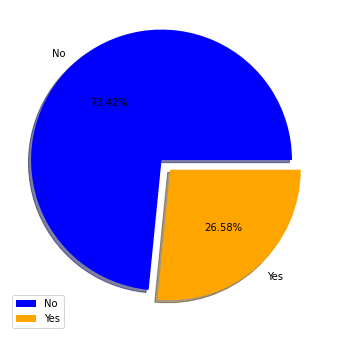

In [25]:
# Menampilkan dalam bentuk pie chart
plt.figure(figsize= (10, 6))
labels = data_copy['Churn'].unique()
data_pie  = data_copy['Churn'].value_counts()
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['Blue', 'Orange'])
plt.legend()
plt.show()

Dataset ini imbalanced, dapat dilihat 73.42% pelanggan tidak ingin churn, 26.58% lainnya churn.

## **Demographic Information vs Crunch**

In [26]:
# Menampilkan total masing masing Gender dari customer churn
churn_gender = pd.crosstab(data_copy["Churn"],data_copy["gender"])
churn_gender

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


In [27]:
# Menampilkan total SeniorCitizen dari customer churn
churn_sc = pd.crosstab(data_copy["Churn"],data_copy["SeniorCitizen"])
churn_sc

SeniorCitizen,0,1
Churn,,
No,4497,666
Yes,1393,476


In [28]:
# Menampilkan total Partner dari customer churn
churn_partner = pd.crosstab(data_copy["Churn"],data_copy["Partner"])
churn_partner

Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


In [29]:
# Menampilkan total Dependents dari customer churn
churn_dependents = pd.crosstab(data_copy["Churn"],data_copy["Dependents"])
churn_dependents

Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


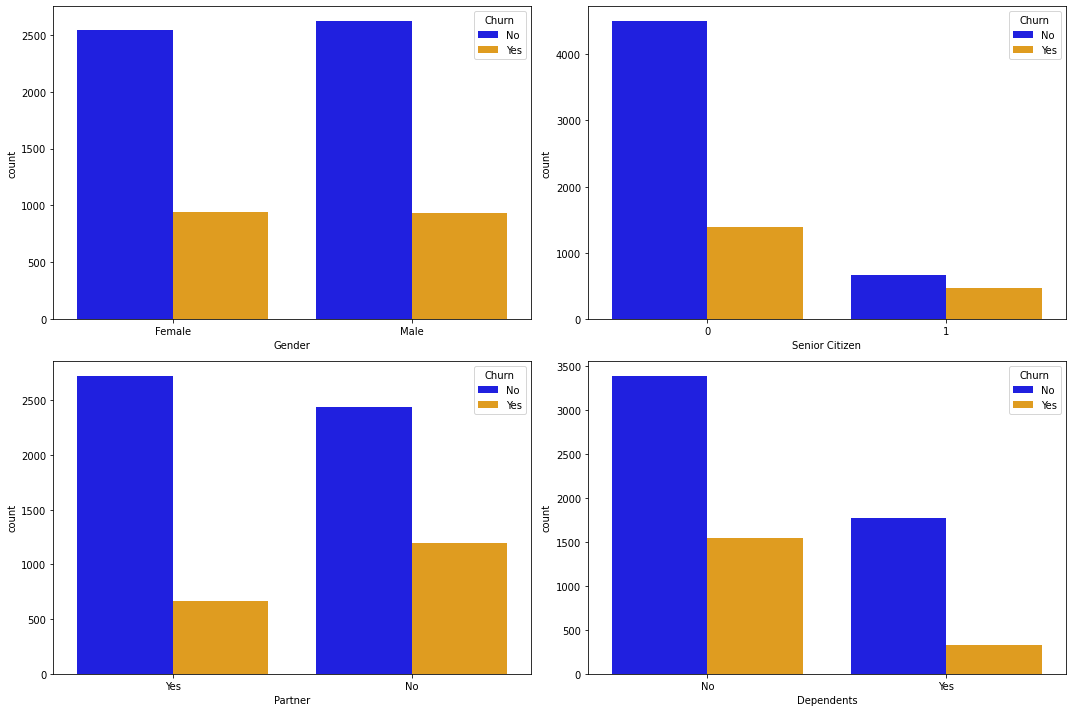

In [30]:
# Membuat plot demographic information vs crunch

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
colors= ['Blue', 'Orange']
ax1 = sns.countplot(x ='gender', data= data_copy, hue= 'Churn', ax= ax[0, 0], palette= colors)
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= data_copy, hue= 'Churn', ax= ax[0, 1], palette= colors)
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= data_copy, hue= 'Churn', ax= ax[1, 0], palette= colors)
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= data_copy, hue= 'Churn', ax= ax[1, 1], palette= colors)
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Dari visualisasi diatas dapat dilihat ;
- gender tidak mempengaruhi churn, karna jumlah customer churn yg memiliki gender female dan male tidak terlalu jauh berbeda
- senior citizen cenderung untuk menjadi customer churn.
- customer yang tidak memliki pasangan cenderung menjadi customer churn.
- customer yang tidk memiliki tanggungan cenderung menjadi cutomer churn.

## **Service Information vs churn**

In [31]:
# Menampilkan total PhoneService dari customer churn
churn_phone_service = pd.crosstab(data_copy["Churn"],data_copy["PhoneService"])
churn_phone_service

PhoneService,No,Yes
Churn,,
No,510,4653
Yes,170,1699


In [32]:
# Menampilkan total MultipleLines dari customer churn
churn_ML = pd.crosstab(data_copy["Churn"],data_copy["MultipleLines"])
churn_ML

MultipleLines,No,No phone service,Yes
Churn,,,
No,2536,510,2117
Yes,849,170,850


In [33]:
# Menampilkan total InternetService dari customer churn
churn_IS = pd.crosstab(data_copy["Churn"],data_copy["InternetService"])
churn_IS

InternetService,DSL,Fiber optic,No
Churn,,,
No,1957,1799,1407
Yes,459,1297,113


In [34]:
# Menampilkan total OnlineSecurity dari customer churn
churn_OS = pd.crosstab(data_copy["Churn"],data_copy["OnlineSecurity"])
churn_OS

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2036,1407,1720
Yes,1461,113,295


In [35]:
# Menampilkan total OnlineBackup dari customer churn
churn_OB = pd.crosstab(data_copy["Churn"],data_copy["OnlineBackup"])
churn_OB

OnlineBackup,No,No internet service,Yes
Churn,,,
No,1854,1407,1902
Yes,1233,113,523


In [36]:
# Menampilkan total DeviceProtection dari customer churn
churn_DP = pd.crosstab(data_copy["Churn"],data_copy["DeviceProtection"])
churn_DP

DeviceProtection,No,No internet service,Yes
Churn,,,
No,1883,1407,1873
Yes,1211,113,545


In [37]:
# Menampilkan total TechSupport dari customer churn
churn_TS = pd.crosstab(data_copy["Churn"],data_copy["TechSupport"])
churn_TS

TechSupport,No,No internet service,Yes
Churn,,,
No,2026,1407,1730
Yes,1446,113,310


In [38]:
# Menampilkan total StreamingTV dari customer churn
churn_STV = pd.crosstab(data_copy["Churn"],data_copy["StreamingTV"])
churn_STV

StreamingTV,No,No internet service,Yes
Churn,,,
No,1867,1407,1889
Yes,942,113,814


In [39]:
# Menampilkan total StreamingMovies dari customer churn
churn_SMV = pd.crosstab(data_copy["Churn"],data_copy["StreamingMovies"])
churn_SMV

StreamingMovies,No,No internet service,Yes
Churn,,,
No,1843,1407,1913
Yes,938,113,818


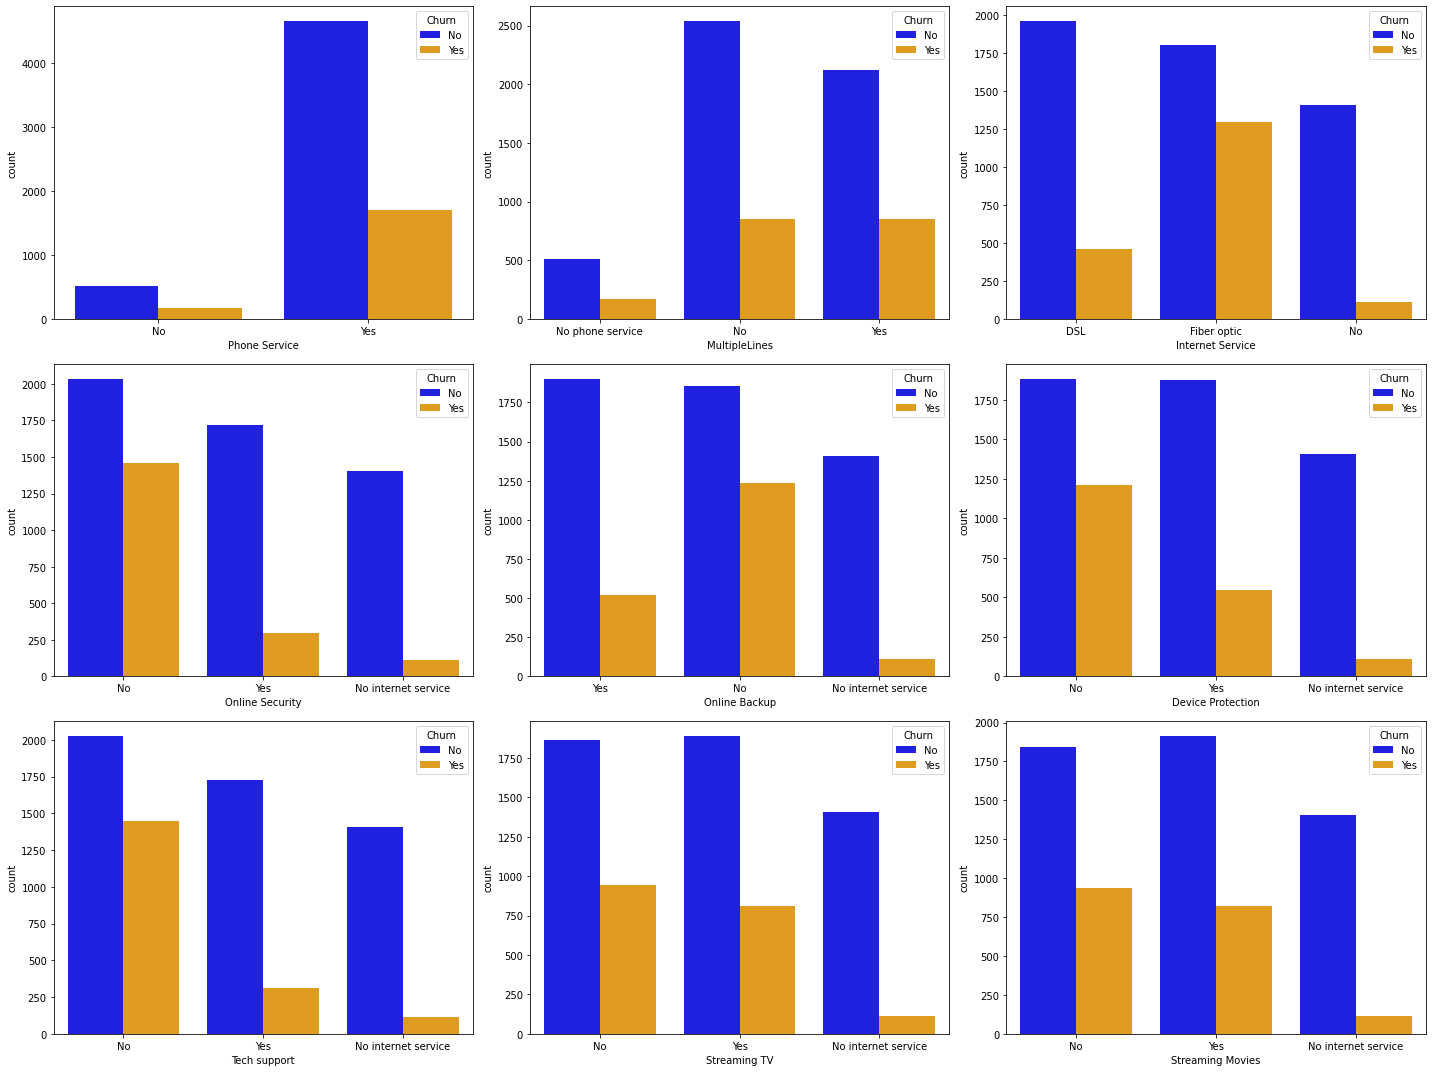

In [40]:
# Membuat plot service information vs crunch
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

ax1 = sns.countplot(x ='PhoneService', data= data_copy, hue= 'Churn', ax= ax[0, 0], palette= colors)
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= data_copy, hue= 'Churn', ax= ax[0, 1], palette= colors)
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= data_copy, hue= 'Churn', ax= ax[0, 2], palette= colors)
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= data_copy, hue= 'Churn', ax= ax[1, 0], palette= colors)
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= data_copy, hue= 'Churn', ax= ax[1, 1], palette= colors)
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= data_copy, hue= 'Churn', ax= ax[1, 2], palette= colors)
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= data_copy, hue= 'Churn', ax= ax[2, 0], palette= colors)
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= data_copy, hue= 'Churn', ax= ax[2, 1], palette= colors)
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= data_copy, hue= 'Churn', ax= ax[2, 2], palette= colors)
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()


dari data dan visualisasi diatas dapat dilihat customer yang memiliki internet service lebih banyak menajdi churn dibandingkan yang tidak, terutama yang menggukan fiberoptic.
serta costumer yang tidak memiliki service online security, online backup, device protection, tech support, streaming tv, streaming movies.


## **Account Information**

In [41]:
# Menampilkan total Contract dari customer churn
churn_contract = pd.crosstab(data_copy["Churn"],data_copy["Contract"])
churn_contract

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


In [42]:
# Menampilkan total PaperlessBilling dari customer churn
churn_PB = pd.crosstab(data_copy["Churn"],data_copy["PaperlessBilling"])
churn_PB

PaperlessBilling,No,Yes
Churn,,
No,2395,2768
Yes,469,1400


In [43]:
# Menampilkan total PaymentMethod dari customer churn
churn_PM = pd.crosstab(data_copy["Churn"],data_copy["PaymentMethod"])
churn_PM

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1296
Yes,258,232,1071,308


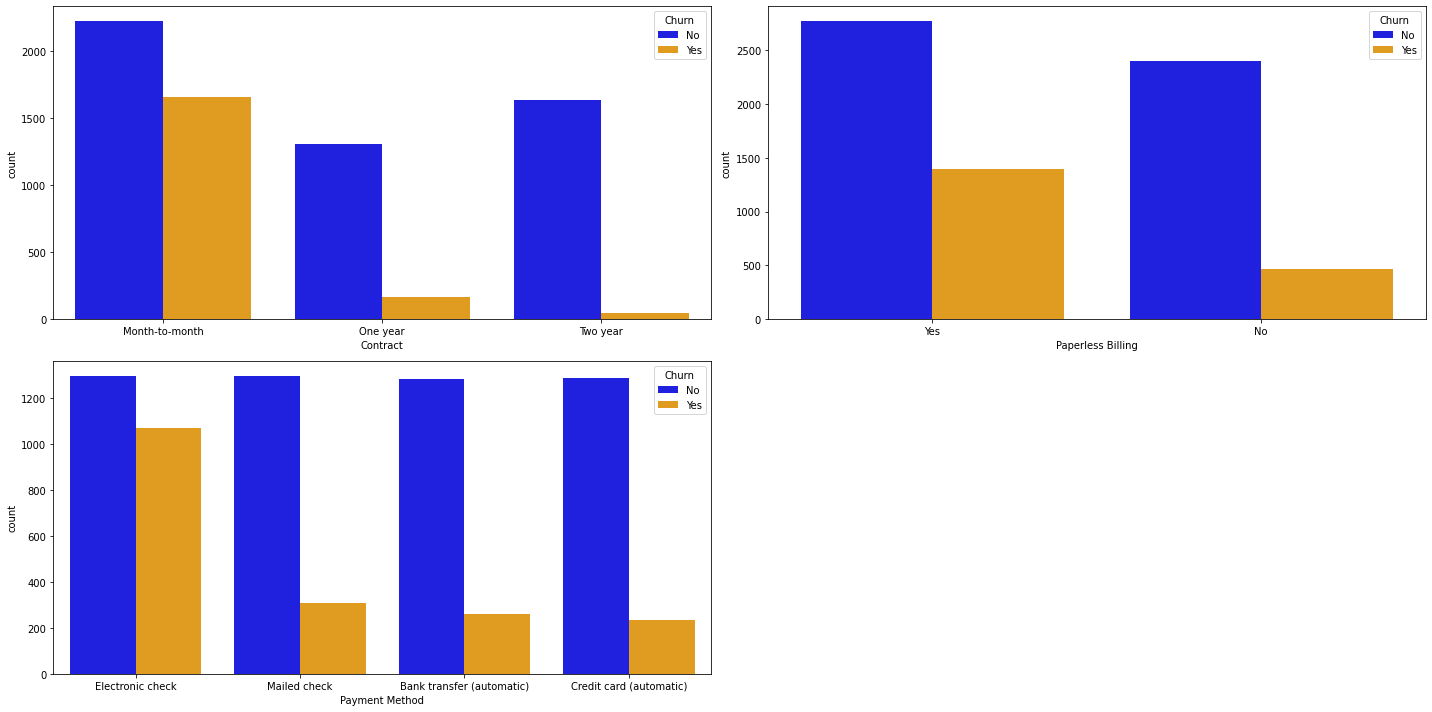

In [44]:
# Membuat plot account information (categorical) vs crunch
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

ax1 = sns.countplot(x ='Contract', data= data_copy, hue= 'Churn', ax= ax[0, 0], palette= colors)
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= data_copy, hue= 'Churn', ax= ax[0, 1], palette= colors)
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= data_copy, hue= 'Churn', ax= ax[1, 0], palette= colors)
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

Dari data dan visualisasi diatas dapat dilihat;
- customer yang memiliki contract bulanan lebih banyak churn dibanding yang contract 1 atau 2 tahun.
- customer yang yang menggunakan paperless billing lebih banyak churn dibanding yang tidak
-customer yang pembayarannya menggunakan electornic check lebih banyak churn dibanding yang lainnya

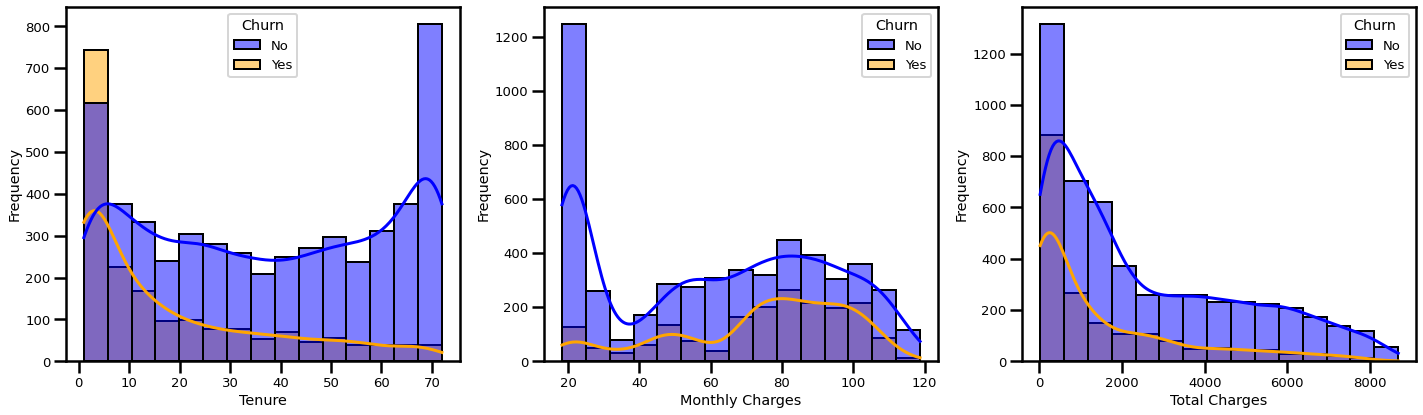

In [45]:
# Membuat plot account information (numerical) vs crunch
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

ax1 = sns.histplot(x = data_copy['tenure'],color= 'teal', hue= data_copy['Churn'], ax= ax[0], bins= 15, kde= True, palette= colors)
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data_copy['MonthlyCharges'], color= 'teal', hue= data_copy['Churn'], ax= ax[1], bins= 15, kde= True, palette= colors)
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data_copy['TotalCharges'], color= 'teal', hue= data_copy['Churn'], ax= ax[2], bins= 15, kde= True, palette= colors)
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

dari plot diatas dapat dilihat bahwa customer dengan tenure yang lebih rendah  lebih banyak yang churn, dibandingkan tenure yang lebih tinggi. maka dapat disimpulkan bahwa semakin lama customer tersebut berlangganan maka semakin kecil kemungkinan untuk churn.

** Kesimpulan EDA **

Berdasarkan hasil eksplorasi diatas maka dapat disimpulkan beberapa point berikut ;
- dataset ini imbalanced dengan perbandingan jumlah data churn yes dan no adalah 7 : 3.
- senior citizen lebih banyak churn dibandingkan dengan yang tidak.
- customer yang memiliki internet service lebih banyak menajdi churn dibandingkan yang tidak, terutama yang menggukan fiberoptic. serta costumer yang tidak memiliki service online security, online backup, device protection, tech support, streaming tv, streaming movies.
- semakin lama customer tersebut berlangganan maka semakin kecil kemungkinan untuk churn.

# 5- Data Preprocessing

## Get Data for Model Inference

In [46]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=3)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
808,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1496,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
4326,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
492,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
2215,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
4445,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
1934,Female,0,No,No,3,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
1166,Female,0,No,No,5,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
1278,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
591,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


In [47]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [48]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,Female,0,No,No,3,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,Female,0,No,No,5,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


## Splitting between `X` and `y`

In [49]:
# Splitting between X and y

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [50]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=3)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4500, 19)
Val Size :  (1126, 19)
Test Size :  (1407, 19)


## Handling Outliers

### Identify Outliers

In [51]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (data) and the variable of interest as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

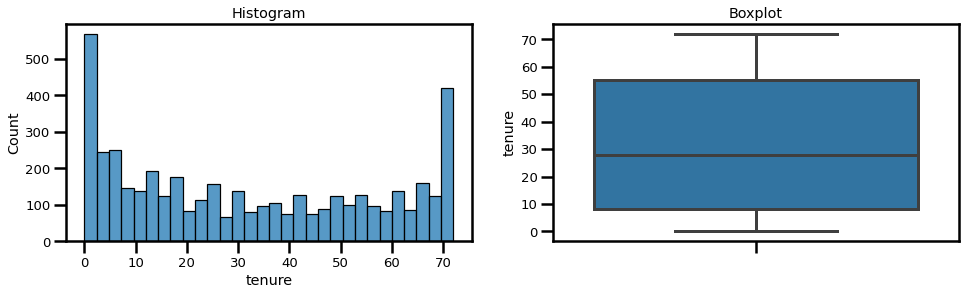


Skewness Value :  0.2590487805289517


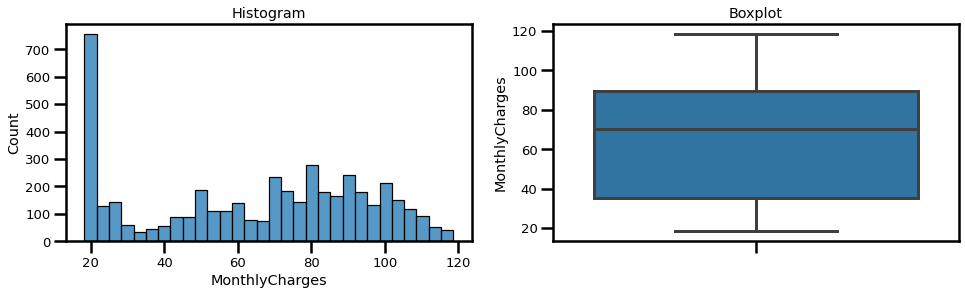


Skewness Value :  -0.21077672128836866


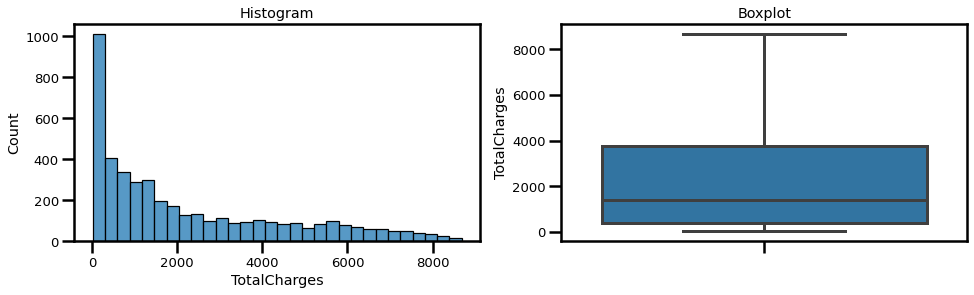


Skewness Value :  0.9845920449648036


In [52]:
# Cek distribusi data semua variabel dari X_train

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

Dari plot diatas dapat dilihat;
- Tenure memiliki distribusi normal
- MonthlyCharges & TotalCharges skew
- tidak terlihat outlier pada ketiga kolom, sehingga tidak perlu handle outliers

## Handling Missing Values

In [53]:
# Cek missing Values X_train
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [54]:
# Cek missing Values X_val
X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [55]:
# Cek missing Values X_test
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

terdapat missing values pada kolom TotalCharges di X_train,X_val,X_test.
saya akan handle dengan melakukan replace dengan nilai median.

In [56]:
# Replace missing values X_train with median values
median_X_train = X_train['TotalCharges'].median()
X_train['TotalCharges'].fillna(median_X_train, inplace=True)

# Replace missing values X_test with median values
median_X_test = X_test['TotalCharges'].median()
X_test['TotalCharges'].fillna(median_X_test, inplace=True)

# Replace missing values X_val with median values
median_X_val = X_val['TotalCharges'].median()
X_val['TotalCharges'].fillna(median_X_val, inplace=True)

In [57]:
# Cek missing Values X_train
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [58]:
# Cek missing Values X_val
X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [59]:
# Cek missing Values X_test
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

sudah tidak telrihat missing values

## Feature Selection

In [60]:
# Display X_train

X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4190,Female,0,Yes,Yes,52,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.05,1255.10
6684,Male,0,Yes,Yes,8,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),76.15,645.80
1842,Female,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.30,755.50
5671,Female,1,Yes,No,34,Yes,No,DSL,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.30
6993,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,Male,0,No,No,10,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,863.10
1038,Female,0,No,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.30,360.35
520,Male,1,Yes,No,29,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.60,1442.00
6232,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),107.45,7658.30


Berdasarkan hasil EDA gender tidak memiliki korelasi terhadap churn. jadi saya akan drop kolom gender.

In [61]:
# Drop Columns

X_train.drop(['gender'], axis=1, inplace=True)
X_val.drop(['gender'], axis=1, inplace=True)
X_test.drop(['gender'], axis=1, inplace=True)
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4190,0,Yes,Yes,52,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.05,1255.10
6684,0,Yes,Yes,8,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),76.15,645.80
1842,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.30,755.50
5671,1,Yes,No,34,Yes,No,DSL,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.30
6993,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,0,No,No,10,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,863.10
1038,0,No,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.30,360.35
520,1,Yes,No,29,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.60,1442.00
6232,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),107.45,7658.30


## Get Numerical Columns and Categorical Columns

In [62]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Pipeline

In [63]:
# Create A pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [64]:
# save pipeline
pickle.dump(final_pipeline, open('preprocess_churn.pkl', 'wb'))

In [65]:
# Fit and Transform

X_train_pipeline = final_pipeline.fit_transform(X_train)
X_val_pipeline = final_pipeline.transform(X_val)
X_test_pipeline = final_pipeline.transform(X_test)
X_train_pipeline.shape

(4500, 44)

##  Encoding Y target

dikarenakan bentuk dari target categorical maka perlu dilakukan encoding menggunakan Label Encoder

In [66]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [67]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [68]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)
y_val_encoded = labelencoder.transform(y_val)

In [69]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['Churn'])
y_val_enc = pd.DataFrame(y_val_encoded, columns=['Churn'])

# 6- Sequential API

## 6.1 - Model Definition

In [70]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(44, activation='relu', input_shape=(44,))) # Hidden Layer 1
model_sequential.add(Dense(22, activation='relu'))
model_sequential.add(Dense(11, activation='relu'))
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                1980      
                                                                 
 dense_1 (Dense)             (None, 22)                990       
                                                                 
 dense_2 (Dense)             (None, 11)                253       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 3,235
Trainable params: 3,235
Non-trainable params: 0
_________________________________________________________________


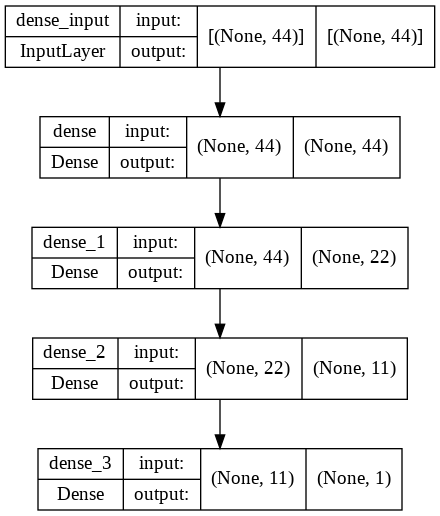

In [71]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Model Training

In [72]:
# Train Program
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_pipeline,y_train_enc))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(64)

## Now we got a test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_pipeline,y_test_enc))
test_dataset = test_dataset.shuffle(buffer_size=100).batch(64)

## Now we got a val dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_pipeline,y_val_enc))
val_dataset = val_dataset.shuffle(buffer_size=100).batch(64)

In [73]:
## Train the Model

%%time
history_seq = model_sequential.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
71/71 [==============================] - 5s 10ms/step - loss: 0.5778 - accuracy: 0.6929 - val_loss: 0.4434 - val_accuracy: 0.8037
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.4437 - accuracy: 0.7916 - val_loss: 0.3982 - val_accuracy: 0.8179
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4298 - accuracy: 0.7949 - val_loss: 0.3923 - val_accuracy: 0.8233
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.7958 - val_loss: 0.3894 - val_accuracy: 0.8250
Epoch 5/100
71/71 [==============================] - 1s 7ms/step - loss: 0.4216 - accuracy: 0.7993 - val_loss: 0.3883 - val_accuracy: 0.8268
Epoch 6/100
71/71 [==============================] - 1s 7ms/step - loss: 0.4193 - accuracy: 0.8007 - val_loss: 0.3875 - val_accuracy: 0.8259
Epoch 7/100
71/71 [==============================] - 0s 7ms/step - loss: 0.4170 - accuracy: 0.8029 - val_loss: 0.3879 - val_accuracy: 0.8268
Epoch 8/100


## 6.3 - Model Evaluation

In [74]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.58,0.69,0.44,0.80
1,0.44,0.79,0.40,0.82
2,0.43,0.79,0.39,0.82
3,0.42,0.80,0.39,0.83
4,0.42,0.80,0.39,0.83
...,...,...,...,...
95,0.29,0.87,0.53,0.76
96,0.29,0.87,0.52,0.77
97,0.29,0.87,0.52,0.77
98,0.29,0.87,0.53,0.77


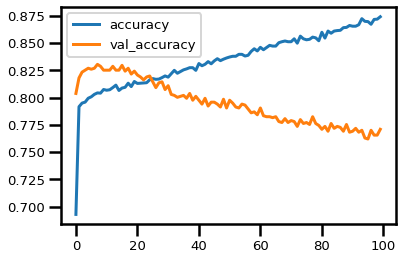

In [75]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

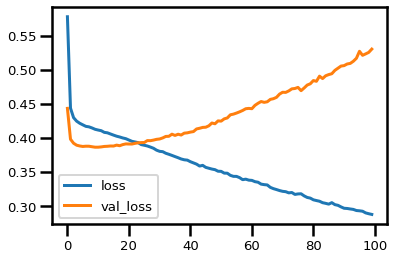

In [76]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [77]:
# Model Evaluation using Classification Report

y_pred_seq = model_sequential.predict(X_test_pipeline)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1050
           1       0.52      0.46      0.49       357

    accuracy                           0.76      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.75      0.76      0.75      1407



## 6.4 Model Improvement

In [78]:
model_imp_seq = tf.keras.models.Sequential()
model_imp_seq.add(tf.keras.layers.Dense(44,input_shape=(44,),kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model_imp_seq.add(tf.keras.layers.Dense(22))
model_imp_seq.add(tf.keras.layers.BatchNormalization())
model_imp_seq.add(tf.keras.layers.Activation('relu'))

model_imp_seq.add(tf.keras.layers.Dense(11))
model_imp_seq.add(tf.keras.layers.BatchNormalization())
model_imp_seq.add(tf.keras.layers.Activation('relu'))

model_imp_seq.add(tf.keras.layers.Dense(6))
model_imp_seq.add(tf.keras.layers.BatchNormalization())
model_imp_seq.add(tf.keras.layers.Activation('relu'))

model_imp_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_imp_seq.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics='accuracy')

history_imp_seq = model_imp_seq.fit(train_dataset, epochs=100,
                    validation_data=val_dataset,verbose=1)

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 0.6300 - accuracy: 0.6411 - val_loss: 0.6003 - val_accuracy: 0.7229
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.5505 - accuracy: 0.7342 - val_loss: 0.5499 - val_accuracy: 0.7496
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.7462 - val_loss: 0.5049 - val_accuracy: 0.7647
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7522 - val_loss: 0.4771 - val_accuracy: 0.7735
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7498 - val_loss: 0.4585 - val_accuracy: 0.7842
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.7569 - val_loss: 0.4458 - val_accuracy: 0.7851
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4627 - accuracy: 0.7651 - val_loss: 0.4372 - val_accuracy: 0.7851
Epoch 8/100
7

In [79]:
# Create Dataframe

history_imp_seq_df = pd.DataFrame(history_imp_seq.history)
history_imp_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.63,0.64,0.60,0.72
1,0.55,0.73,0.55,0.75
2,0.51,0.75,0.50,0.76
3,0.49,0.75,0.48,0.77
4,0.48,0.75,0.46,0.78
...,...,...,...,...
95,0.38,0.81,0.41,0.82
96,0.38,0.81,0.40,0.82
97,0.38,0.81,0.40,0.81
98,0.38,0.81,0.40,0.82


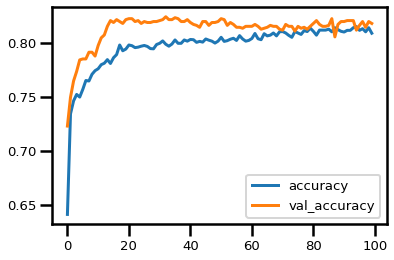

In [80]:
# Plot between Accuracy and val_accuracy

history_imp_seq_df[['accuracy', 'val_accuracy']].plot()

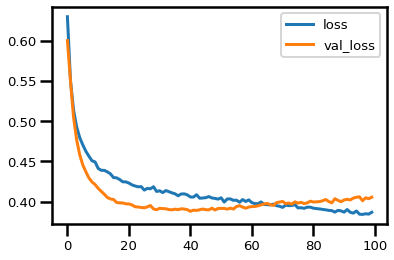

In [81]:
# Plot between loss and val_loss

history_imp_seq_df[['loss', 'val_loss']].plot()

In [82]:
# Model Evaluation using Classification Report

y_pred_imp_seq = model_imp_seq.predict(X_test_pipeline)
y_pred_imp_seq = np.where(y_pred_imp_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_imp_seq))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1050
           1       0.62      0.53      0.57       357

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [83]:
model_imp_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 44)                1980      
                                                                 
 dense_5 (Dense)             (None, 22)                990       
                                                                 
 batch_normalization (BatchN  (None, 22)               88        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 22)                0         
                                                                 
 dense_6 (Dense)             (None, 11)                253       
                                                                 
 batch_normalization_1 (Batc  (None, 11)               44        
 hNormalization)                                      

### Model Sequential Analysis

dari model sequential,berdasarkan hasil score precision jika kita ingin memprediksi customer yang tetap (churn=0) model dapat memprediksi 84% (True Positif) customer yang diprediksi tidak akan churn.

sedangkan prediksi customer yang churn (churn=1) hanya dapat memprediksi 61%(true positif) customer akan churn.

setelah dilakukan improvement pada model sequential dengan menambahkah initializer GlorotNormal dan optimizer SGD.
hasilnya model dapat memprediksi customer yang tetap (churn=0) model dapat memprediksi 84% (True Positif) customer yang diprediksi tidak akan churn.

sedangkan prediksi customer yang churn (churn=1) hanya dapat memprediksi 67%(true positif) customer akan churn.

# 7- Functional API

## 7.1 - Model Definition

In [84]:
# Create Functional Model

input_layer = Input(shape=(44,))
hidden_layer1 = Dense(44, activation='relu')(input_layer)
hidden_layer2 = Dense(22, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(11, activation='relu')(hidden_layer2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer3)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense_9 (Dense)             (None, 44)                1980      
                                                                 
 dense_10 (Dense)            (None, 22)                990       
                                                                 
 dense_11 (Dense)            (None, 11)                253       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 3,235
Trainable params: 3,235
Non-trainable params: 0
_________________________________________________________________


## 7.2 - Model Training

In [85]:
## Train the Model

%%time
history_func = model_functional.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
71/71 [==============================] - 1s 5ms/step - loss: 0.4995 - accuracy: 0.7467 - val_loss: 0.3988 - val_accuracy: 0.8135
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7916 - val_loss: 0.3906 - val_accuracy: 0.8206
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.7931 - val_loss: 0.3884 - val_accuracy: 0.8171
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.7980 - val_loss: 0.3869 - val_accuracy: 0.8233
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.7987 - val_loss: 0.3879 - val_accuracy: 0.8206
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.7973 - val_loss: 0.3877 - val_accuracy: 0.8197
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8007 - val_loss: 0.3874 - val_accuracy: 0.8224
Epoch 8/100
7

## 7.3 - Model Evaluation

In [86]:
# Create Dataframe

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.50,0.75,0.40,0.81
1,0.44,0.79,0.39,0.82
2,0.43,0.79,0.39,0.82
3,0.42,0.80,0.39,0.82
4,0.42,0.80,0.39,0.82
...,...,...,...,...
95,0.28,0.87,0.49,0.79
96,0.28,0.87,0.49,0.79
97,0.28,0.87,0.49,0.79
98,0.28,0.87,0.50,0.79


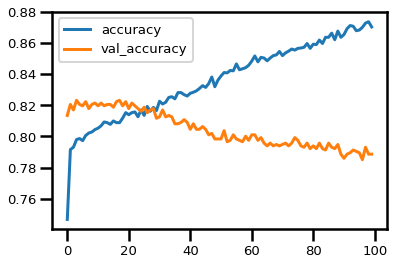

In [87]:
# Plot between Accuracy and val_accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()

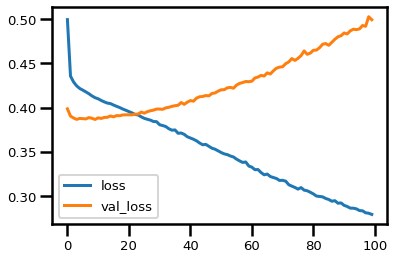

In [88]:
# Plot between loss and val_loss

history_func_df[['loss', 'val_loss']].plot()

In [89]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(X_test_pipeline)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1050
           1       0.53      0.54      0.53       357

    accuracy                           0.76      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



## 7.4 Model Improvement

In [90]:
# Create Functional Model

input_layer_imp = Input(shape=(44,))
hidden_layer_imp1 = Dense(44, activation='relu')(input_layer_imp)
hidden_layer_imp2 = Dense(22, activation='relu')(hidden_layer_imp1)
hidden_layer_imp3 = Dense(11, activation='relu')(hidden_layer_imp2)
output_layer_imp = Dense(1, activation='sigmoid')(hidden_layer_imp3)

model_functional_imp = Model(inputs=input_layer_imp, outputs=output_layer_imp)

# Model Compile
model_functional_imp.compile(loss='binary_crossentropy', 
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=['accuracy'])

model_functional_imp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense_13 (Dense)            (None, 44)                1980      
                                                                 
 dense_14 (Dense)            (None, 22)                990       
                                                                 
 dense_15 (Dense)            (None, 11)                253       
                                                                 
 dense_16 (Dense)            (None, 1)                 12        
                                                                 
Total params: 3,235
Trainable params: 3,235
Non-trainable params: 0
_________________________________________________________________


In [91]:
## Train the Model

%%time
history_imp_func = model_functional_imp.fit(train_dataset, epochs=100, validation_data=val_dataset)

Epoch 1/100
71/71 [==============================] - 1s 5ms/step - loss: 0.6670 - accuracy: 0.6504 - val_loss: 0.6332 - val_accuracy: 0.7309
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.7316 - val_loss: 0.5859 - val_accuracy: 0.7327
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7318 - val_loss: 0.5508 - val_accuracy: 0.7327
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7318 - val_loss: 0.5201 - val_accuracy: 0.7327
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.7342 - val_loss: 0.4909 - val_accuracy: 0.7353
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7433 - val_loss: 0.4653 - val_accuracy: 0.7682
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7713 - val_loss: 0.4448 - val_accuracy: 0.7922
Epoch 8/100
7

In [92]:
# Create Dataframe

history_imp_func_df = pd.DataFrame(history_imp_func.history)
history_imp_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.67,0.65,0.63,0.73
1,0.61,0.73,0.59,0.73
2,0.57,0.73,0.55,0.73
3,0.54,0.73,0.52,0.73
4,0.51,0.73,0.49,0.74
...,...,...,...,...
95,0.41,0.81,0.39,0.82
96,0.41,0.81,0.39,0.82
97,0.41,0.81,0.39,0.82
98,0.41,0.81,0.39,0.82


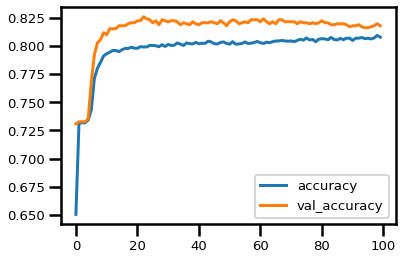

In [93]:
# Plot between Accuracy and val_accuracy

history_imp_func_df[['accuracy', 'val_accuracy']].plot()

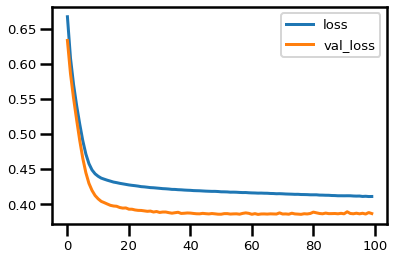

In [94]:
# Plot between loss and val_loss

history_imp_func_df[['loss', 'val_loss']].plot()

In [95]:
# Model Evaluation using Classification Report

y_pred_imp_func = model_functional_imp.predict(X_test_pipeline)
y_pred_imp_func = np.where(y_pred_imp_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_imp_func))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1050
           1       0.66      0.52      0.58       357

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [96]:
model_functional_imp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense_13 (Dense)            (None, 44)                1980      
                                                                 
 dense_14 (Dense)            (None, 22)                990       
                                                                 
 dense_15 (Dense)            (None, 11)                253       
                                                                 
 dense_16 (Dense)            (None, 1)                 12        
                                                                 
Total params: 3,235
Trainable params: 3,235
Non-trainable params: 0
_________________________________________________________________


### Model Funtional Analysis

dari model functional,berdasarkan hasil score precision jika kita ingin memprediksi customer yang tetap (churn=0) model dapat memprediksi 84% (True Positif) customer yang diprediksi tidak akan churn.

sedangkan prediksi customer yang churn (churn=1) hanya dapat memprediksi 65%(true positif) customer akan churn.

setelah dilakukan improvement pada model sequential dengan menambahkah initializer GlorotNormal dan optimizer SGD.

hasilnya model dapat memprediksi customer yang tetap (churn=0) model dapat memprediksi 84% (True Positif) customer yang diprediksi tidak akan churn.

sedangkan prediksi customer yang churn (churn=1) hanya dapat memprediksi 65%(true positif) customer akan churn.

pada nilai precision tidak terdapat improvement, tetapi nilai akurasi meningkat dari 75% menjadi 81%.

berdasarkan analysis model sequential dan functional baik yang sebelum dan setelah dilakukan improvement maka saya memutuskan ;
1. saya memilih model sequential setelah di lakukan improvement. karena nilai precission 0 dan 1 serta akurasi yang lebih baik di banding model lainnya.

2. perlu dilakukan analisa lebih mendalam terhadap parameter lainnya agar model tidak overfit.

In [97]:
# Model freeze
model_imp_seq.trainable = False

In [98]:
model_imp_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 44)                1980      
                                                                 
 dense_5 (Dense)             (None, 22)                990       
                                                                 
 batch_normalization (BatchN  (None, 22)               88        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 22)                0         
                                                                 
 dense_6 (Dense)             (None, 11)                253       
                                                                 
 batch_normalization_1 (Batc  (None, 11)               44        
 hNormalization)                                      

In [99]:
model_imp_seq.save('churn_model')

In [100]:
! zip -r churn_model.zip churn_model

  adding: churn_model/ (stored 0%)
  adding: churn_model/assets/ (stored 0%)
  adding: churn_model/saved_model.pb (deflated 90%)
  adding: churn_model/variables/ (stored 0%)
  adding: churn_model/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: churn_model/variables/variables.index (deflated 62%)
  adding: churn_model/keras_metadata.pb (deflated 92%)


# 8- Model inference

In [101]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,Female,0,No,No,3,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,Female,0,No,No,5,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


## Inference Preprocessing

Tidak melakukan preprocessing karena menggunakan pipeline

## Infernce Prediction

In [102]:
# mendefinisikan nama data_inf menjadi inference
inference=data_inf

In [103]:
# membuat mendefiniskan inference_pipline terhadap data inference sudah di panggil fungsi pipline
inference_pipline= final_pipeline.transform(inference)

In [104]:
#mendefinisikan variable yang berisi model
y_pred_inf_seq =model_imp_seq.predict(inference_pipline)

In [105]:
#memakai fungsi numpy agar target menjadi 0 dan 1
y_pred_inf_seq=np.where(y_pred_inf_seq >= 0.5, 1, 0)

In [106]:
#kembalikan ke bentuk semula menjadi yes dan no
y_pred_inf_seq= labelencoder.inverse_transform(y_pred_inf_seq)

In [107]:
#rubah ke data frame
y_pred_inf_seq = pd.DataFrame(y_pred_inf_seq, columns=['sequential'])
y_pred_inf_seq

,sequential
0,No
1,No
2,Yes
3,Yes
4,No
5,No
6,No
7,No
8,No
9,No


In [108]:
#cek data inference original
inference['Churn']

0    Yes
1     No
2    Yes
3    Yes
4     No
5     No
6    Yes
7     No
8     No
9     No
Name: Churn, dtype: object

In [109]:
#Buat dataframe prediction
predictions = pd.concat([inference['Churn'], y_pred_inf_seq], axis=1)
predictions.columns = ['Actual','sequential']
predictions

,Actual,sequential
0,Yes,No
1,No,No
2,Yes,Yes
3,Yes,Yes
4,No,No
5,No,No
6,Yes,No
7,No,No
8,No,No
9,No,No


# 9- Conclusion

Berdasarkan hasil EDA :
- dataset ini imbalanced dengan perbandingan jumlah data churn yes dan no adalah 7 : 3.
- senior citizen lebih banyak churn dibandingkan dengan yang tidak.
- customer yang memiliki internet service lebih banyak menajdi churn dibandingkan yang tidak, terutama yang menggukan fiberoptic. serta costumer yang tidak memiliki service online security, online backup, device protection, tech support, streaming tv, streaming movies.
- semakin lama customer tersebut berlangganan maka semakin kecil kemungkinan untuk churn.

Berdasarkan hasil evaluasi model;
- Model masih tergolong overfit, perlu dilakukan penelitian lebih lanjut dengan menggunakan parameter berbeda agar model tidak overfit.